In [15]:
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import units as u
coord = SkyCoord.from_name('J140404.9+005953.3')
xid = SDSS.query_region(coord,radius=5*u.arcsec,spectro=True)
spectra = SDSS.get_spectra(matches=xid)[0]
spec = spectra[1].data

Text(0, 0.5, 'Flux')

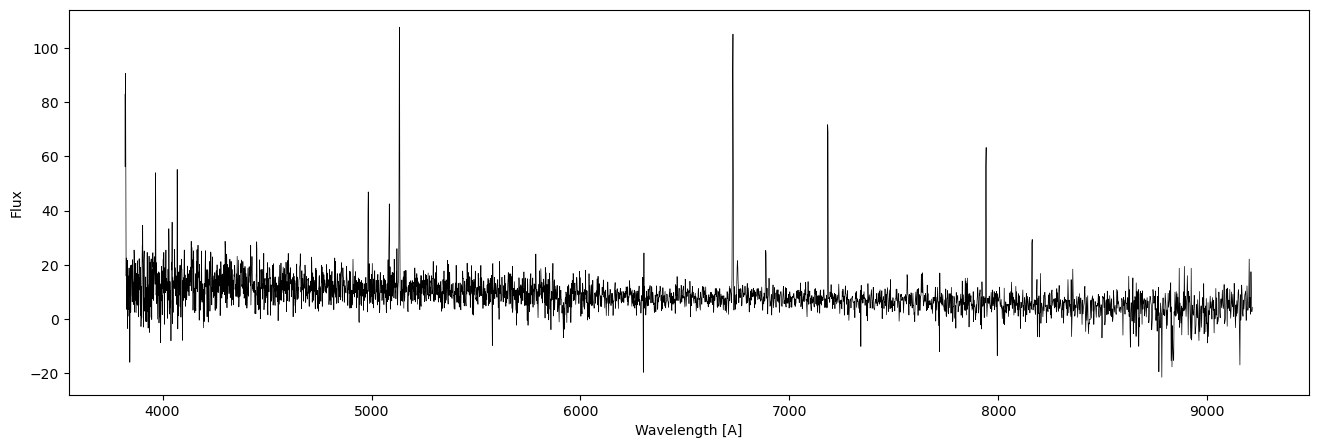

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(10**spec['loglam'],spec['flux'],lw=0.5,color='k')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')

In [149]:
import numpy as np
ind, = np.where((10**spec['loglam'] > 6600)&(10**spec['loglam'] < 7000))
wl_use = 10**spec['loglam'][ind]
fl_use = spec['flux'][ind]

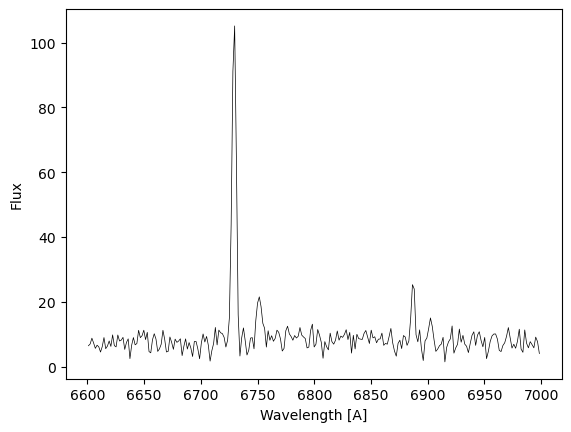

In [151]:
fig, ax = plt.subplots()
ax.plot(wl_use, fl_use, lw=0.5, color='k')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux');

In [172]:
def gauss(x, amp, loc, sigma, offset):
    return offset + (amp * np.exp(-np.power(x-loc,2.0)/(2*np.power(sigma,2.0))))

In [180]:
from scipy.optimize import curve_fit
guess = [110, 6730, 5, 10]
fit = curve_fit(f=gauss, xdata=wl_use, ydata=fl_use, p0=guess)
fit

(array([1.01215785e+02, 6.72927788e+03, 1.76251269e+00, 8.15964756e+00]),
 array([[ 7.56917399e+00, -1.13755744e-04, -8.70377490e-02,
         -2.87361801e-02],
        [-1.13755744e-04,  3.04673017e-03,  3.82500113e-06,
         -7.42816396e-07],
        [-8.70377490e-02,  3.82500113e-06,  3.07843449e-03,
         -1.00344601e-03],
        [-2.87361801e-02, -7.42816396e-07, -1.00344601e-03,
          4.07040303e-02]]))

In [182]:
xx = np.linspace(6600,7000,1000)

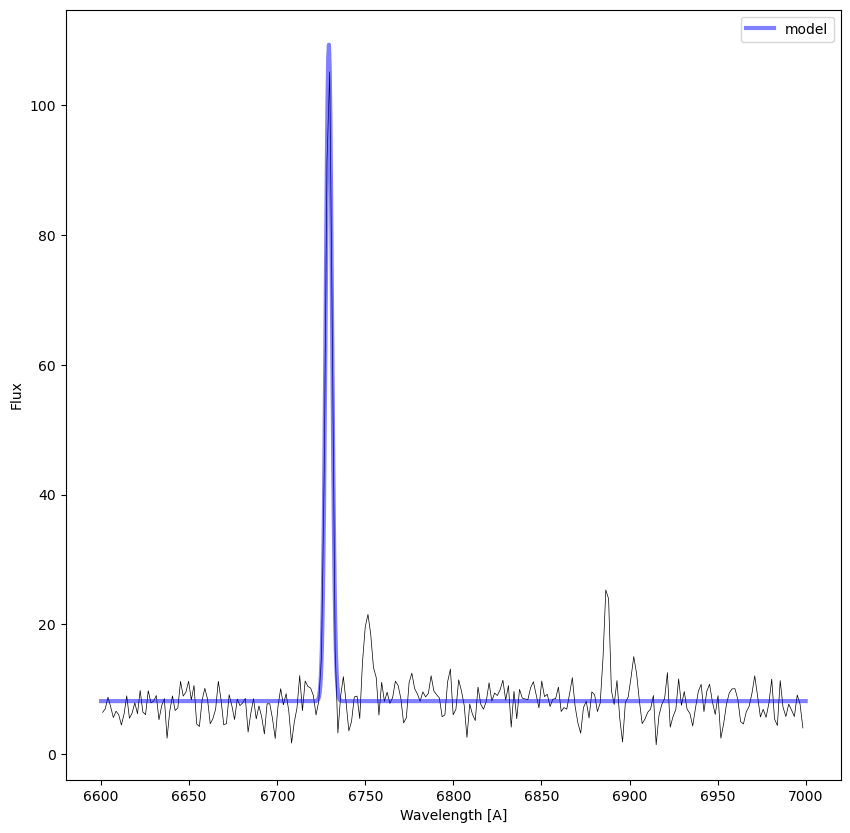

In [202]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(wl_use, fl_use, lw=0.5, color='k')

ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')

params = fit[0]
ax.plot(xx, gauss(xx, *params), label='model', color='b',alpha=0.5,linewidth=3)
ax.legend();